# P2 Udacity Project: Investigate the Titanic dataset - S.Jaeger submission

## Background Information

For the final project, you will conduct your own data analysis and create a file to share that documents your findings. You should start by taking a look at your dataset and brainstorming what questions you could answer using it. Then you should use Pandas and NumPy to answer the questions you are most interested in, and create a report sharing the answers. You will not be required to use statistics or machine learning to complete this project, but you should make it clear in your communications that your findings are tentative. This project is open-ended in that we are not looking for one right answer.

The dataset that will be investigated in this document is related to the <B>Titanic</B>.

Wikimedia commons [3] proposes below public domain picture for the Titanic:
<a title="See page for author [Public domain], via Wikimedia Commons" href="https://commons.wikimedia.org/wiki/File%3ATitanic.jpg"><img width="512" alt="Titanic" src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/92/Titanic.jpg/512px-Titanic.jpg"/></a>


## Data analysis

**Question **:

Brainstorm some questions you could answer using the data set you chose, then start answering those questions. Here are some ideas to get you started:
•Titanic Data•What factors made people more likely to survive?

Try and suggest questions that promote looking at relationships between multiple variables. You should aim to analyze at least one dependent variable and three independent variables in your investigation. Make sure you use NumPy and Pandas where they are appropriate!

**Answer**: See below.


In [132]:
# import all necessary packages and functions.
import csv
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn
%matplotlib inline

In [133]:
# file locations
file_in  = 'titanic-data.csv'

# Create a single dataframe to store all samples and differences
dataframe = pd.read_csv(file_in)

dataframe.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


Above table provides a view on a limited sample records of the data. An accurate variable description is available on the Kaggle website [2] where the data is taken from. Just looking at the few first records, we can notice some data quality issue, with DataFrame containing some N/A, mainly for the Cabin column where data is often missing and also within age column where a few records are also missing. Let us quantify those issues:

In [134]:
dataframe.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

From the count result we can confirm our first feeling, as the data set contains 891 records with most of the columns filled except for Cabin (about 2 records over 9 are filled), and Age (about 7 records over 9 are filled). But as count provides accurate results we can also notice that 2 records are missing from the Embarked column. This could not be seen with the quick glimpse we had in a first place.

**Let us clean-up the data first:**
To clean the data, we consider relevant to remove the Cabin column as it is not reliable (too often missing) but we want to keep all other ones where records are consistant. In the end we shall get 714 (#Age records) - 2(#missing Embarked value, for those records, the remaining of the line is consistent) = 712.

**Note:**
Below extract from [4] Encyclopedia Titanica confirms that not considering the Cabin data can be relevant:
<I>The allocation of cabins on the Titanic is a source of continuing interest and endless speculation. Apart from the recollections of survivors and a few tickets and boarding cards, the only authoritative source of cabin data is the incomplete first class passenger list recovered with the body of steward Herbert Cave. The list below includes this data and includes the likely occupants of some other cabins determined by other means. 

The difficulty in determining, with any degree of accuracy, the occupancy of cabins on the Titanic indicates the need for further research in this area.</I><BR>


In [135]:
dataframe.drop('Cabin', axis=1, inplace = True)
dataframe.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Embarked       889
dtype: int64

As per our plan, we chosed to **drop** the Cabin column. This needs to be done before calling dropna otherwise it would result in loosing too much data.
After removing this column, the amount of rows having Na is much less, so **dropna** will not spoil too much of the data and all remaining data will be clean. In the end we will come with a 712 rows dataframe.

In [136]:
print float(712)/891
dataframe.dropna(inplace = True)#Using dropna without droping Cabin column first would result in loosing too much data
dataframe.count()

0.799102132435


PassengerId    712
Survived       712
Pclass         712
Name           712
Sex            712
Age            712
SibSp          712
Parch          712
Ticket         712
Fare           712
Embarked       712
dtype: int64

Here the choice of using dropNa rather than trying to heal the data has been made as it will keep 80% of the data untouched. 
We think that 712 records is a reasonable quantity to continue this analysis and we do not think we introduce any bias by removing it. 

In [137]:
dataframe.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


The describe dataframe feature enable to get a quick overview of the data for the remaining 712 passengers after cleaning data. For example, we can see how was the 'average' Titanic passenger: about 30 years old, travelling in second class, affording his fare about 60\$ (where the 25 percent quartile passengers paid below 8$). So, in my opinion the average Titanic passenger would be quite wealthy (or let's say 'middle class') as this kind of trip should be quite expensive at that time.

Let us now focus on the survival rate, independantly of any other factor:

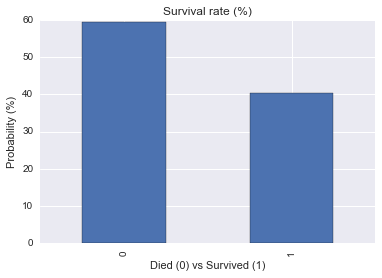

In [138]:
(100 * dataframe['Survived'].value_counts()/712).plot(title="Survival rate (%)",kind="bar")
axes = plt.xlabel("Died (0) vs Survived (1)")
axes = plt.ylabel("Probability (%)")

From above chart, without considering other variables, we can see that a Titanic passenger would have 60% of chances to die. Let us dig into the data to see how this result can change when controlling some of the other known variables:
- Has the age of the Passengers an influence on the survival rate ?
- Has the social origin (wealthiness) an influence on the survival rate ?
- Has the sex an influence on the surival rate ?

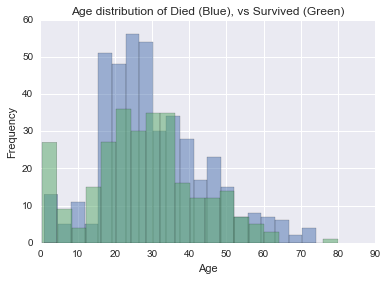

In [139]:
dataframe.groupby('Survived')['Age'].plot(title="Age distribution of Died (Blue), vs Survived (Green)",kind="hist", bins=20, alpha = 0.5)
axes = plt.xlabel("Age")


The above histogram shows that both age histograms of Died and Survived people mostly overlap and share about the same overall distribution. However we can notice some interesting differences:
- A peak in the age interval [20,30] for the Died category (blue). Which means that people within this age interval where more likely to die.
- A peak int he age interval [0,20] for the Survived category (green). Which means that children where more likely to survive.

Let-us clearly distinguish between the two categories:

In [140]:
dataframe.groupby('Survived').describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  424.000000  424.000000   424.000000  424.000000   
         mean    30.626179   22.965456    0.365566   442.299528    2.485849   
         std     14.172110   31.448825    0.878341   264.739548    0.743633   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.895800    0.000000   200.750000    2.000000   
         50%     28.000000   11.887500    0.000000   436.000000    3.000000   
         75%     39.000000   26.550000    0.000000   683.250000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  288.000000  288.000000  288.000000   288.000000  288.000000   
         mean    28.193299   51.647672    0.531250   457.850694    1.878472   
         std     14.859146   70.664499    0.808747   249.666625    0.836340   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   13.000000    0.000000   261.500000    1.000000   
         50%     28.000000   26.250000    0.000000   452.000000    2.000000   
         75%     36.000000   65.000000    1.000000   666.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  424.000000  
         mean     0.525943  
         std      1.044760  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      5.000000  
1        count  288.000000  
         mean     0.496528  
         std      0.732512  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

This table is also meaningful: the mean Age does not change very much between the 2 categories, however the mean Fare and passenger class are much higher (1st class rather than 3rd class) for survivals. This indicates that it would be worth having a closer look at those two variables.

Note: Sex is not described in this table as values are in string format.

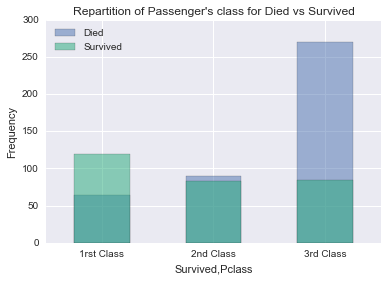

In [141]:
#Grouping by Survived & Class, then counting
groupeddata= dataframe.groupby(['Survived','Pclass'])['PassengerId'].count()
#Plotting died group
groupeddata[0:3].plot(kind="bar",alpha=0.5, label='Died')
#Superimposing survived group
ax1= groupeddata[3:7].plot(kind="bar",color='#23AA79',alpha=0.5, label = 'Survived',title="Repartition of Passenger's class for Died vs Survived")
ax1.set_xticklabels(["1rst Class", "2nd Class", "3rd Class"], rotation=0)
axes = plt.ylabel("Frequency")
legend = plt.legend(loc='best')

Above chart super-imposes two bar charts: passenger class for Died passengers, in blue, and passenger class for Survived passengers, in green. Super-imposing the two histograms highlights some important facts for each passenger class:
- Passengers in 1st class: Green bar is much higher than blue one (almost double the size), which means that first class passengers are more likely to survive than die. This is only true for first class.
- Passengers in 2nd class: Both bars are about the same size, which means that second class passengers had about equals chances of dying or surviving.
- Passengers in 3rd class: Blue bar is much higher than green one, (almost triple the size), which means that third class passengers are more likely to die than survive. This is only true for third class. Another striking fact about third class is that there are much more people within this class (frequency) than for any other class.

As a conclusion we clearly see the influence of the passenger's class over survival to the Titanic: 1st class passengerS are more likely to survive whereas third class passenger are much more likely to die.
Let us check if class is the only driver to understand who was likely to die or survive.

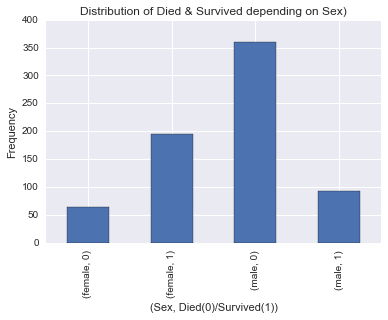

In [142]:
axes = dataframe.groupby(['Sex','Survived'])['PassengerId'].count().plot(kind ="bar", title = "Distribution of Died & Survived depending on Sex)")
axes = plt.xlabel("(Sex, Died(0)/Survived(1))")
axes = plt.ylabel("Frequency")

Clearly sex seems also to have an influence as above chart illustrates that women are much more likely to survive whereas men are much more likely to die.
Let us visualize the data combining the two variables (Sex and Passenger class).

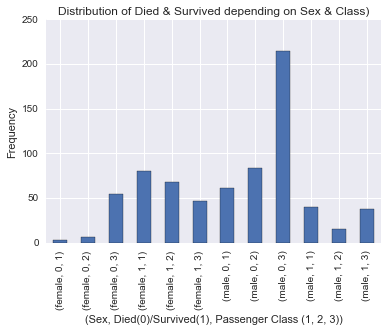

In [143]:
axes = dataframe.groupby(['Sex','Survived','Pclass'])['PassengerId'].count().plot(kind ="bar", title = "Distribution of Died & Survived depending on Sex & Class)")
axes = plt.xlabel("(Sex, Died(0)/Survived(1), Passenger Class (1, 2, 3))")
axes = plt.ylabel("Frequency")

This last distribution highlights 3 categories worth to notice: 
- A huge peak for died males of third class. This is by far the biggest bar for the whole distribution.
- Two nearly empty categories: the died female in 1st or 2nd class.

By combining the two categories, it is even more striking that Sex & Class seem to be correlated to likelihood of survival: Titanic passengers seemed to have far more chance to die if they were men in 3rd class rather than woman in 1rst class.

So far we did not investigate that much the fare column. Let's see if other visualization means can bring other insights.


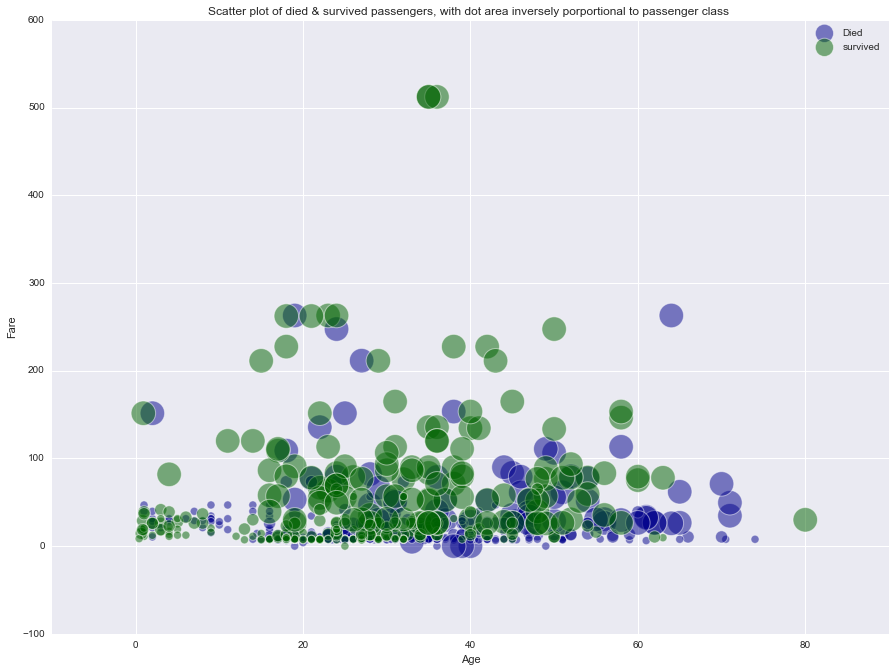

In [144]:
#modifying figure size
plt.rcParams['figure.figsize'] = (15, 11)

#Looping on Survived groups
for surv,group in dataframe.groupby('Survived'):
    plotcolor=''
    if surv == 0:
        #Color for Died
        plotcolor='DarkBlue'
        #retaining ax to overlap two scatter plots
        ax=group.plot(kind='scatter',x='Age',y='Fare',color=plotcolor, s=(1/group['Pclass'])*(1/group['Pclass'])*600,label="Died",linewidths=1, edgecolor='w',alpha=0.5)

    else:
        #Color for Survived
        plotcolor='DarkGreen'
        #providing same ax as previous plot to overlap the two of them 
        group.plot(kind='scatter',x='Age',y='Fare',color=plotcolor,ax=ax, s=(1/group['Pclass'])*(1/group['Pclass'])*600, label="survived",linewidths=1, edgecolor='w',alpha=0.5)

txt = plt.title("Scatter plot of died & survived passengers, with dot area inversely porportional to passenger class ")

A simple scatter plot of the Age against the Fare would not be very meaningful in itself (but those were the only numeric series that would enable the scatter plot). However, by playing with the area of the dots (inversely proportional to the passenger class, i.e The better the class is, the Bigger the dots are), and with the color of the dots (blue for died and green for survived), the scatter plot brings interesting results (**isn't it beautiful ?**):<br>
- For example, small dots are really on the bottom of the plot (low class payed low cost), whereas bigger dots are upward. 
- We can also see that as we go upward, there are fewer blue dots (died) and much more green dots (survived). This suggests that people that paid highest fare had proportionally better chance not to die. On the contrary, blue dots seem to accumulate at the bottom of the chart (for lower fare). This is the same finding than what was observed for the passenger class in other paragraphs.
- We also retrieve another finding discussed previously: The left hand side of the plot (children below 20 years old) is mostly green, which means that many of them survived.

**Note:**
To better distinguish between the 3 possible size of dots (corresponding to the 3 possible values for Pclass), and to have biggest dots for 1st class, size of the dots has been computed as inversely proportional to the Pclass **squared**.

Probability to survive for a passenger:
0.404494382022
Probability to survive for a passenger in 1rst class:
0.652173913043
Probability to survive for a female:
0.752895752896
Probability to survive for a children under 20
0.481707317073


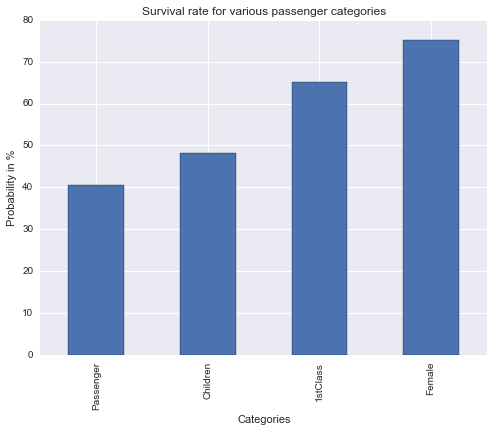

In [145]:
#modifying figure size
plt.rcParams['figure.figsize'] = (8, 6)

#Enpty dict to store survival rate
survivals = {}

#Getting counts for processing probabilities
nbPassenger =  dataframe.count().PassengerId
nbDied = dataframe.groupby(['Survived']).count().PassengerId.loc[0]
nbSurvived = dataframe.groupby(['Survived']).count().PassengerId.loc[1]
nbClass1 = dataframe.groupby(['Pclass']).count().PassengerId[1]
nbFemale = dataframe.groupby(['Sex']).count().PassengerId.loc['female']


print "Probability to survive for a passenger:"
pSurv=float(nbSurvived)/nbPassenger
print pSurv
survivals['Passenger']=pSurv

print "Probability to survive for a passenger in 1rst class:"
pFirst = dataframe.groupby(['Survived','Pclass']).count().PassengerId.loc[1,1]/float(nbClass1)
print pFirst
survivals['1stClass']=pFirst

print "Probability to survive for a female:"
pFemale = dataframe.groupby(['Survived','Sex']).count().PassengerId.loc[1,'female']/float(nbFemale)
print pFemale
survivals['Female']=pFemale

#Computing proba for Children under twnety by adding another column in the dataframe
dataframe.insert(8,'Children', dataframe.Age<20)
nbChildren = dataframe.groupby(['Children']).count().PassengerId.loc[True]
print "Probability to survive for a children under 20"
pChildren = dataframe.groupby(['Survived','Children']).count().PassengerId.loc[1,True]/float(nbChildren) 
print pChildren

survivals['Children']=pChildren

survivalsSerie = 100 *pd.Series(survivals)
survivalsSerie.sort_values(inplace=True)
ax = survivalsSerie.plot(kind='bar', title = "Survival rate for various passenger categories")
ax = plt.ylabel('Probability in %')
ax = plt.xlabel('Categories')

**Conclusion:**<br>
From the detailed analysis and visualization of this data we now have enough insights to answer to the questions raised:<br>
•Has the age of the Passengers an influence on the survival rate ?<br>
•Has the social origin (wealthiness) an influence on the survival rate ?<br>
•Has the sex an influence on the surival rate ?<br>

We think that age has not much influence on the survival rate except for some specific categories like children under 20.<BR> 
However, studying both Fare and Class provided about the same conclusions: 
Wealthiest passengers (within the higher class or paying the highest fare) were more likely to survive.
After all, both class or fare can be related somehow to social category. For this reason we expect them to be strongly correlated, but this assertion would need to be proven; We can see also from the results that Female were more likely to survive.<BR>
The last bar chart provides a sorted comparaison between the survival rate of each category where we can see that the most likely to surviVe are in this order Female (75% of Survival rate), 1st Class passengers (65%), and Children (48). This has to be compared to the survival rate without considering any category (40%).

However assertions within above paragraph are only assumptions as we did not check whether any of those findings were satistically significant or not. Besides, people able to afford such trips at this time were already quite wealthy, that is why drawing conclusions about the social category can introduce some biases. Another bias can come from using the fare as it must probably vary depending on both **the trip length** (not considered in this study) and the passenger class.<BR>
If I had a little more time I would also have a look at the influence of the location of the cabin; Unfortunately the meaning of this data was not very straightforward in term of location on a boat, and to be fully relevant it would have also to take into account the impact point with the iceberg which I do not know.

**Sources & References:**<BR><BR>
Original assignment from udacity:<BR>
[1] Udacity https://classroom.udacity.com/nanodegrees/nd002/parts/0021345403/modules/317671873575461/lessons/3176718735239847/concepts/54201485780923<BR><BR>
Background information on Titanic and investigated dataset:<BR>
[2] Kaggle https://www.kaggle.com/c/titanic/data<BR>
[3] Wikimedia commons https://commons.wikimedia.org/wiki/RMS_Titanic<BR>
[4] Encyclopedia Titanica, https://www.encyclopedia-titanica.org/cabins.html<BR>
[5] Titanic for dummies, Suites and Cabins for Passengers on the Titanic, by By Stephen J. Spignesi  http://www.dummies.com/education/history/suites-and-cabins-for-passengers-on-the-titanic/


**Revisions:**<BR>
    [1] - Wednesday the 7th of December, original submission <BR>
    [2] - Friday the 9th of December, after 1st review.